In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier,NeighborhoodComponentsAnalysis, LocalOutlierFactor
from sklearn.decomposition import PCA

In [3]:
#warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
data = pd.read_csv('Best features.csv')
data.head()

,target,perimeter_mean,area_worst,concave points_mean,concavity_mean,radius_mean,concave points_worst,area_se,area_mean,concavity_worst,perimeter_worst
0,1,122.80,2019.0,0.14710,0.3001,17.99,0.2654,153.40,1001.0,0.7119,184.60
1,1,132.90,1956.0,0.07017,0.0869,20.57,0.1860,74.08,1326.0,0.2416,158.80
2,1,130.00,1709.0,0.12790,0.1974,19.69,0.2430,94.03,1203.0,0.4504,152.50
3,1,77.58,567.7,0.10520,0.2414,11.42,0.2575,27.23,386.1,0.6869,98.87
4,1,135.10,1575.0,0.10430,0.1980,20.29,0.1625,94.44,1297.0,0.4000,152.20


In [34]:
y = data.target
x = data.drop(["target"],axis = 1)
columns = X.columns.tolist()

In [23]:
clf = LocalOutlierFactor()
y_pred = clf.fit_predict(x)
X_score = clf.negative_outlier_factor_
outlier_score = pd.DataFrame()
outlier_score["score"] = X_score
outlier_score.head()

,score
0,-1.421523
1,-1.067086
2,-0.979029
3,-1.666518
4,-1.068818


In [24]:
threshold = -2
filtre = outlier_score["score"] < threshold
outlier_index = outlier_score[filtre].index.tolist()

In [35]:
X = x.drop(outlier_index)
y = y.drop(outlier_index).values


In [26]:
test_size =0.3
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = test_size, random_state = 42)

In [27]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [38]:
X_train_df = pd.DataFrame(X_train, columns = columns)
X_train_df.head()
X_train_df["target"] = y_train

In [39]:
from sklearn.svm import SVC
svc_model = SVC()

In [40]:
svc_model.fit(X_train, y_train)
y_pred = svc_model.predict(X_test)
cm = np.array(confusion_matrix(y_test, y_pred, labels=[1,0]))

In [41]:
from sklearn.metrics import classification_report, confusion_matrix
cm = np.array(confusion_matrix(y_test, y_pred, labels=[1,0]))
confusion = pd.DataFrame(cm, index=['Kanserli ' , 'Sağlıklı '],
                         columns =['Kanserli Tahmini' , 'Sağlıklı Tahmini'])
confusion.head()

,Kanserli Tahmini,Sağlıklı Tahmini
Kanserli,65,5
Sağlıklı,3,96


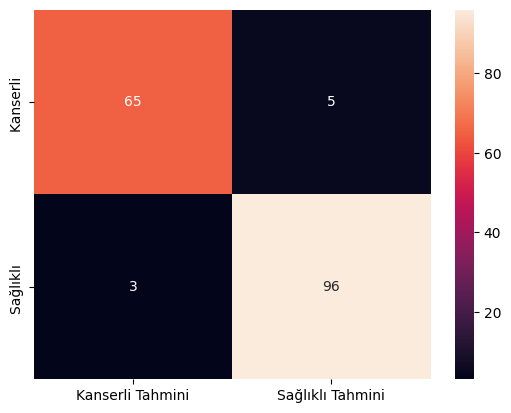

In [42]:
sns.heatmap(confusion, annot=True,); 

In [33]:
print(classification_report(y_test , y_pred))        

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        99
           1       0.96      0.93      0.94        70

    accuracy                           0.95       169
   macro avg       0.95      0.95      0.95       169
weighted avg       0.95      0.95      0.95       169

